In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
data = pd.read_csv('samsum-train.csv')

In [5]:
data.head(5)

,id,dialogue,summary
0,13818513,Amanda: I baked cookies. Do you want some?\r\...,Amanda baked cookies and will bring Jerry some...
1,13728867,Olivia: Who are you voting for in this electio...,Olivia and Olivier are voting for liberals in ...
2,13681000,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...",Kim may try the pomodoro technique recommended...
3,13730747,"Edward: Rachel, I think I'm in ove with Bella....",Edward thinks he is in love with Bella. Rachel...
4,13728094,Sam: hey overheard rick say something\r\nSam:...,"Sam is confused, because he overheard Rick com..."


In [6]:
data.shape

(13168, 3)

In [7]:
data = data.drop('id', axis=1)

In [8]:
data.head(5)

,dialogue,summary
0,Amanda: I baked cookies. Do you want some?\r\...,Amanda baked cookies and will bring Jerry some...
1,Olivia: Who are you voting for in this electio...,Olivia and Olivier are voting for liberals in ...
2,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...",Kim may try the pomodoro technique recommended...
3,"Edward: Rachel, I think I'm in ove with Bella....",Edward thinks he is in love with Bella. Rachel...
4,Sam: hey overheard rick say something\r\nSam:...,"Sam is confused, because he overheard Rick com..."


In [9]:
data.isnull().sum()

,0
dialogue,1
summary,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13168 entries, 0 to 13167
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dialogue  13167 non-null  object
 1   summary   13168 non-null  object
dtypes: object(2)
memory usage: 205.9+ KB


In [11]:
data.describe()

,dialogue,summary
count,13167,13168
unique,12793,13167
top,"Jimmy: Hey, guess what? My car's completely ka...",Frank likes Macy's red outfit.
freq,4,2


In [12]:
data.dropna(subset=['dialogue'], inplace=True)

In [13]:
data.isnull().sum()

,0
dialogue,0
summary,0


In [14]:
new_data = data.head(5000)
display(new_data.shape)

(5000, 2)

# Data Preprocessing

In [15]:
new_data['dialogue'] = new_data['dialogue'].str.lower()
new_data['summary'] = new_data['summary'].str.lower()

/tmp/ipython-input-15-3154667941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['dialogue'] = new_data['dialogue'].str.lower()
/tmp/ipython-input-15-3154667941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['summary'] = new_data['summary'].str.lower()


In [16]:
import re

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # remove symbols/punctuations
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    return text.strip()

In [17]:
new_data['dialogue'] = new_data['dialogue'].apply(clean_text)
new_data['summary'] = new_data['summary'].apply(clean_text)

/tmp/ipython-input-17-1943318288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['dialogue'] = new_data['dialogue'].apply(clean_text)
/tmp/ipython-input-17-1943318288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['summary'] = new_data['summary'].apply(clean_text)


 # Text Tokenization

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [19]:
new_data['summary'] = new_data['summary'].apply(lambda x: '<sos> ' + x.strip() + ' <eos>')

/tmp/ipython-input-19-2911003479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['summary'] = new_data['summary'].apply(lambda x: '<sos> ' + x.strip() + ' <eos>')


Adding @SOS and @EOS In Output data bcz Decoder don't know when to the Start and End

In [20]:
print(new_data['summary'].iloc[0])

<sos> amanda baked cookies and will bring jerry some tomorrow <eos>


In [21]:
building_vocab = new_data['dialogue'].tolist() + new_data['summary'].tolist()

In [22]:
tokenizer = Tokenizer(lower=True, filters='', oov_token='<unk>')   # ==> num_words=3000
tokenizer.fit_on_texts(building_vocab)

# in tokanization we assign the Uniqe Values for Each Word

In [25]:
word_index = tokenizer.word_index

print("Vocabulary (word_index):")
for word, index in word_index.items():
    print(f"{word} → {index}")

Vocabulary (word_index):
<unk> → 1
i → 2
the → 3
to → 4
you → 5
a → 6
and → 7
it → 8
is → 9
for → 10
in → 11
<sos> → 12
<eos> → 13
will → 14
of → 15
that → 16
have → 17
but → 18
so → 19
are → 20
on → 21
be → 22
me → 23
at → 24
with → 25
im → 26
not → 27
what → 28
its → 29
we → 30
my → 31
do → 32
know → 33
was → 34
this → 35
about → 36
he → 37
dont → 38
just → 39
her → 40
no → 41
can → 42
she → 43
ok → 44
like → 45
they → 46
there → 47
your → 48
some → 49
how → 50
going → 51
go → 52
ill → 53
if → 54
good → 55
time → 56
see → 57
up → 58
as → 59
from → 60
well → 61
yeah → 62
think → 63
one → 64
get → 65
yes → 66
all → 67
sure → 68
too → 69
has → 70
out → 71
really → 72
now → 73
him → 74
his → 75
want → 76
thats → 77
when → 78
would → 79
come → 80
need → 81
or → 82
thanks → 83
then → 84
oh → 85
d → 86
an → 87
did → 88
new → 89
cant → 90
them → 91
should → 92
got → 93
why → 94
work → 95
tom → 96
great → 97
take → 98
tomorrow → 99
right → 100
back → 101
youre → 102
were → 103
u → 104
much → 

In [26]:
print(f"Vocabulary size: {len(word_index)}")

Vocabulary size: 19375


In [27]:
dialogue_sequences = tokenizer.texts_to_sequences(new_data['dialogue'])
summary_sequences = tokenizer.texts_to_sequences(new_data['summary'])

# that assigning each value we creat a array like [1,3,4,5]  <====  this is the sentence lookin like

In [28]:
print("Sample Dialogue:", new_data['dialogue'].iloc[0])
print("Tokenized:", dialogue_sequences[0])

Sample Dialogue: amanda i baked cookies do you want some jerry sure amanda ill bring you tomorrow
Tokenized: [400, 2, 3634, 1568, 32, 5, 76, 49, 634, 68, 400, 53, 207, 5, 99]


In [29]:
print("Sample Summary:", new_data['summary'].iloc[0])
print("Tokenized:", summary_sequences[0])

Sample Summary: <sos> amanda baked cookies and will bring jerry some tomorrow <eos>
Tokenized: [12, 400, 3634, 1568, 7, 14, 207, 634, 49, 99, 13]


# Padding

In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [31]:
padded_dia = pad_sequences(dialogue_sequences, padding='post')
padded_sum = pad_sequences(summary_sequences, padding='post')    # decoder input hai ya

In [32]:
print("Dialogue Shape:", padded_dia.shape)
print("Summary Shape:", padded_sum.shape)

Dialogue Shape: (5000, 791)
Summary Shape: (5000, 66)


# Now Splittin summary into input & target

In [33]:
padded_sum = np.array(padded_sum)

decoder_input = padded_sum[:, :-1]  # Remove last token for decoder input bcz it is <SOS>

decoder_target = padded_sum[:, 1:]  # Remove first token for decoder target bcz it is <EOS>

In [34]:
print("Decoder input (IDs):", decoder_input[0])
print("Decoder target (IDs):", decoder_target[0])

print("Decoder input (IDs):", decoder_input[0].shape)   # ====> Orignal Shape Will be 60 And after doing this it will be 59
print("Decoder target (IDs):", decoder_target[0].shape)

Decoder input (IDs): [  12  400 3634 1568    7   14  207  634   49   99   13    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]
Decoder target (IDs): [ 400 3634 1568    7   14  207  634   49   99   13    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]
Decoder input (IDs): (65,)
Decoder target (IDs): (65,)


In [35]:
print(decoder_target.shape)         # (1000, 59)
print(decoder_target[..., np.newaxis].shape)  # (1000, 59, 1)

(5000, 65)
(5000, 65, 1)


# Part 1: Encoder–Decoder Summarization Model (Embedding + LSTM)

### We're starting with a basic Encoder–Decoder model using Embedding + LSTM, then i will upgrade it with building Self-Attention from Scratch and testing on it.

In [36]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)
embedding_dim = 512
latent_dim = 512

19376


In [37]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model

# LSTM Encoder

In [38]:
encoder_inputs = Input(shape=(padded_dia.shape[1],), name="encoder_input")     # wo upper wala padded_sum encoder ka input diya hai

enc_emb = Embedding(input_dim=vocab_size, output_dim=embedding_dim, mask_zero=True)(encoder_inputs)   # padded_sum ka emb kiay hai

encoder_outputs, state_h, state_c = LSTM(latent_dim, return_state=True)(enc_emb)

# LSTM Decoder

In [39]:
decoder_inputs = Input(shape=(decoder_input.shape[1],), name="decoder_input")    # ya padded_sum hai upper wala decoder ka input jayenga [state_h, state_c] vector kay form mai

dec_emb = Embedding(input_dim=vocab_size, output_dim=embedding_dim, mask_zero=True)(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True,dropout=0.3,return_state=True)

decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [40]:
# dropout=0.3  ===>   decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
# We are Not Use but

## Output Layer

In [41]:
decoder_dense = Dense(vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define and Compile the Model

In [42]:
from tensorflow.keras.optimizers import RMSprop

In [43]:
model = Model(
    [encoder_inputs, decoder_inputs],
    decoder_outputs)

model.compile(
    optimizer='RMSprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 791)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_input       │ (None, 65)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 791, 512)  │  9,920,512 │ encoder_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 791)       │          0 │ encoder_input[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 65, 512)   │  9,920,512 │ decoder_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 512),     │  2,099,200 │ embedding[0][0],  │
│                     │ (None, 512),      │            │ not_equal[0][0]   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 65, 512), │  2,099,200 │ embedding_1[0][0… │
│                     │ (None, 512),      │            │ lstm[0][1],       │
│                     │ (None, 512)]      │            │ lstm[0][2]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 65, 19376) │  9,939,888 │ lstm_1[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 33,979,312 (129.62 MB)

 Trainable params: 33,979,312 (129.62 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
import numpy as np

history = model.fit(
    [padded_dia, decoder_input],
    decoder_target[..., np.newaxis],
    batch_size=32,
    epochs=30,
    validation_split=0.1
)


Epoch 1/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 30s 173ms/step - accuracy: 0.3138 - loss: 7.8477 - val_accuracy: 0.6761 - val_loss: 6.6199
Epoch 2/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 38s 173ms/step - accuracy: 0.4421 - loss: 6.5505 - val_accuracy: 0.0343 - val_loss: 6.4454
Epoch 3/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 42s 177ms/step - accuracy: 0.0378 - loss: 6.3519 - val_accuracy: 0.0385 - val_loss: 6.3683
Epoch 4/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 41s 177ms/step - accuracy: 0.0408 - loss: 6.2483 - val_accuracy: 0.0463 - val_loss: 6.2023
Epoch 5/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 41s 176ms/step - accuracy: 0.0448 - loss: 6.0793 - val_accuracy: 0.0492 - val_loss: 6.0555
Epoch 6/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 25s 179ms/step - accuracy: 0.0497 - loss: 5.9138 - val_accuracy: 0.0514 - val_loss: 5.9687
Epoch 7/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 40s 175ms/step - accuracy: 0.0535 - loss: 5.7430 - val_accuracy: 0.0551 - val_loss: 5.8294
Epoch 8/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 41s 178ms/step - accuracy: 0.0559 - loss: 5

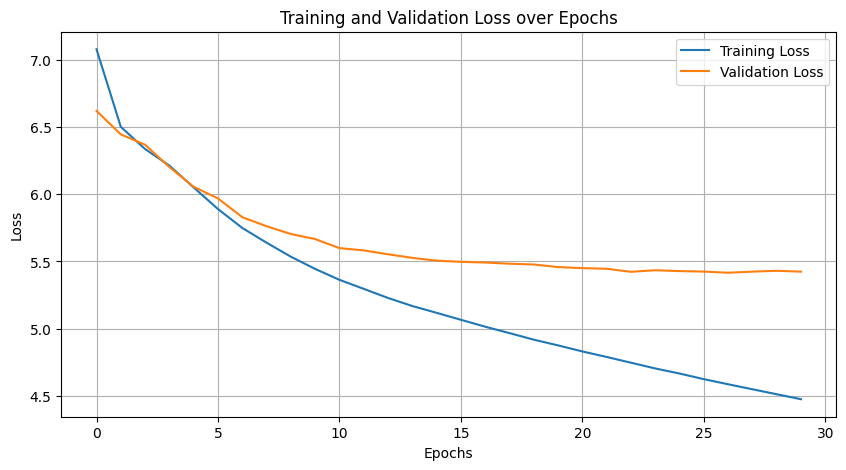

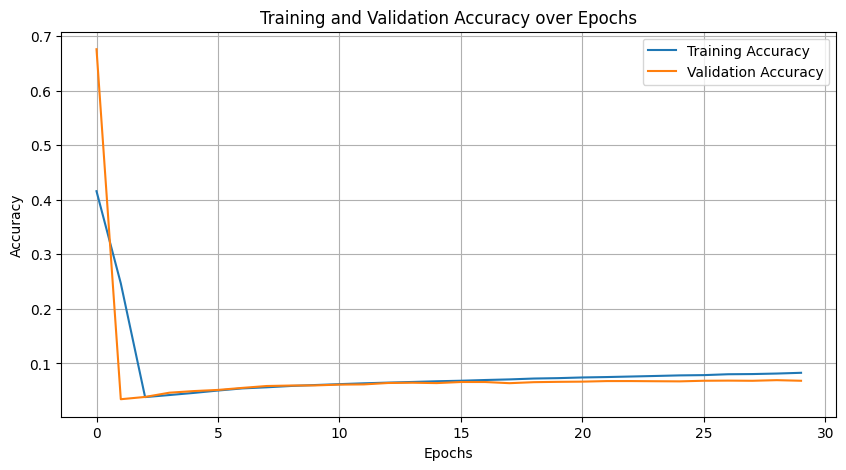

In [45]:
# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 677.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 117.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 116.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


# Checking with the Original Data On LSTM Model





In [59]:
import numpy as np
from tensorflow.keras.models import Model


# Define the encoder model
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# Define the decoder model
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2 = dec_emb # Reuse the decoder embedding layer
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2)

decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)


def decode_sequence(input_seq):

    states_value = encoder_model.predict(input_seq)
    # Get the encoder states from the output of the encoder model
    encoder_states = states_value[1:] # Extract state_h and state_c

    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = tokenizer.word_index['<sos>']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        # Pass the target sequence and the encoder states to the decoder model
        output_tokens, h, c = decoder_model.predict([target_seq] + encoder_states)

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = tokenizer.index_word.get(sampled_token_index, '')

        if (sampled_word == '<eos>' or len(decoded_sentence.split()) > max_target_len):
            stop_condition = True
        else:
            decoded_sentence += ' ' + sampled_word

            target_seq = np.zeros((1, 1))
            target_seq[0, 0] = sampled_token_index

            # Update the states for the next time step
            encoder_states = [h, c]

    return decoded_sentence.strip()


sample_idx = 10  # any index you like

# Get the input text and target summary from your preprocessed dataset
input_text_array = padded_dia[sample_idx]  # original input array
original_summary = padded_sum[sample_idx]  # original target summary string

# Convert input text array to string
input_text = tokenizer.sequences_to_texts([input_text_array])[0]

# Note: max_input_len and max_target_len are not defined, will need to address this later
# For now, using the shape of padded_dia and padded_sum
max_input_len = padded_dia.shape[1]
max_target_len = padded_sum.shape[1] # This might need adjustment based on desired output length

# Convert input text to sequence
input_seq = tokenizer.texts_to_sequences([input_text])


input_seq = np.pad(input_seq, ((0,0), (0, max_input_len-len(input_seq[0]))), mode='constant')

# Predict summary
predicted_summary = decode_sequence(input_seq)

print("="*50)
print(f"Input Text:\n{input_text}")
print("-"*50)
print(f"Original Summary:\n{original_summary}")
print("-"*50)
print(f"Predicted Summary:\n{predicted_summary}")
print("="*50)

NameError: name 'target_tokenizer' is not defined